In [26]:
from sklearn.datasets import make_blobs
# Create dataset with 3 random cluster centers and 1000 datapoints
x,y = make_blobs(n_samples = 1000,centers = 3,n_features = 2,shuffle = True, random_state = 31)

In [27]:
x,y

(array([[-4.10785368,  7.82699681],
        [-5.66810193, -8.43336082],
        [-3.991989  ,  9.4237974 ],
        ...,
        [-4.34556376, 10.08902531],
        [-4.18541548, 10.94587087],
        [-6.60092444, -6.81458897]]),
 array([0, 2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1,
        1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0,
        1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1,
        2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0,
        2, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2,
        1, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2, 1,
        1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1,
        2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2,
        1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1,
        2, 1, 1, 1, 0, 0, 2, 

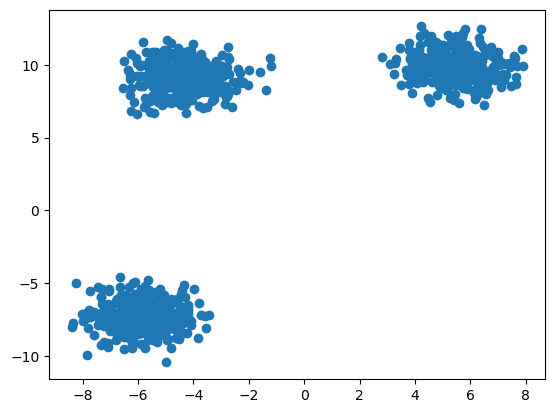

In [28]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1])

In [39]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5,init = 'random',n_init = 10,max_iter = 300,tol = 1e-04,random_state = 0)
y_km = km.fit_predict(x)

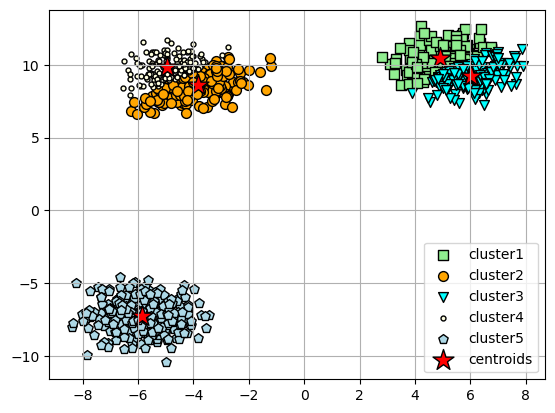

In [30]:
plt.scatter(x[y_km==0,0],x[y_km==0,1],s = 50,c = 'lightgreen',marker = 's',edgecolor = 'black',label = 'cluster1')
plt.scatter(x[y_km==1,0],x[y_km ==1,1],s = 50,c = 'orange',marker = 'o',edgecolor = 'black',label = 'cluster2')
plt.scatter(x[y_km==2,0],x[y_km== 2,1],s = 50, c= 'cyan',marker = 'v',edgecolor = 'black',label = 'cluster3')
plt.scatter(x[y_km==3,0],x[y_km==3,1],s = 50,c = 'lightyellow',marker = '.',edgecolor = 'black',label = 'cluster4')
plt.scatter(x[y_km ==4,0],x[y_km ==4,1],s = 50, c = 'lightblue',marker = 'p',edgecolor= 'black',label = 'cluster5')
#plot the centroids
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s = 250,marker = '*',c = 'red',edgecolor = 'black',
           label = 'centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

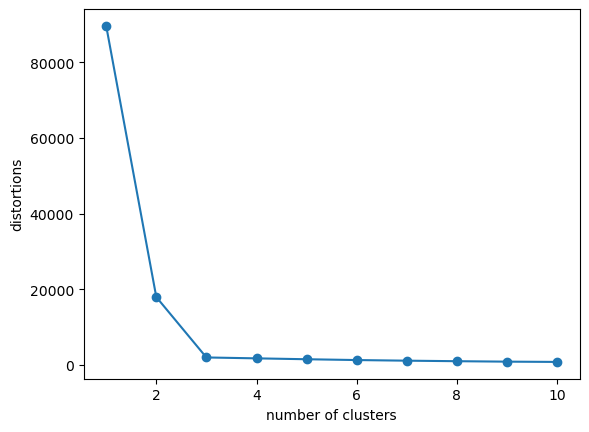

In [31]:
#elbow method
#calculate distortion for a range of number of clusters (optimal number of clusters )
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init = 'random',n_init = 10,max_iter = 300,tol = 1e-04,random_state = 0)
    km.fit(x)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortions')
plt.show()

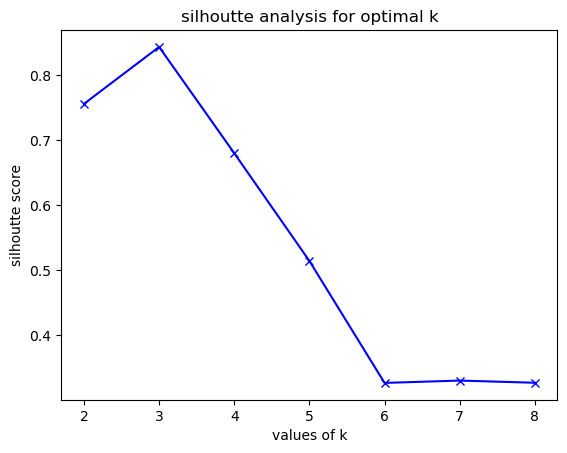

In [32]:
#silhoutte method to find optimal number of clusters
from sklearn.metrics import silhouette_score
import numpy as np
range_n_clusters= np.arange(2,9)
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters,init = 'random',n_init = 10)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(x,cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('values of k')
plt.ylabel('silhoutte score')
plt.title('silhoutte analysis for optimal k')
plt.show()

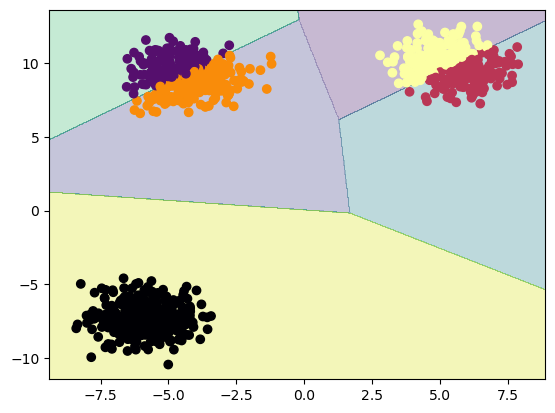

In [36]:
import pandas as pd
a = np.arange(start= min(x[:,0])-1,stop = max(x[:,0])+1,step = 0.02)
b = np.arange(start = min(x[:,1])-1,stop = max(x[:,1])+1,step = 0.02)
xx,yy = np.meshgrid(a,b)
#classifying every point on the meshgrid
input_array = np.array([xx.ravel(),yy.ravel()]).T #ravel() converts the higher dimensional arrays to one-d arrays
km = KMeans(n_clusters = 5,init = 'random',n_init = 10,max_iter = 300,tol = 1e-04,random_state = 0)
fit = km.fit(x)
y_pred = km.predict(x)
labels = km.predict(input_array)
plt.contourf(xx,yy,labels.reshape(xx.shape),alpha = 0.3)
plt.scatter(x[:,0],x[:,1],c = y_pred,cmap = 'inferno_r')

In [40]:
from sklearn import metrics
metrics.accuracy_score(y,y_km)

0.0

C:\Users\naren\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
